<a href="https://colab.research.google.com/github/PatGeorgian/Patrick.Odita.BDAT1004PS-2/blob/main/Assignment5_SVM_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all required libraries

In [44]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
)

# Load dataset

In [45]:
# Load dataset ('spam.xlsx' with your file path)
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("spam.xlsx")

# Keep only relevant columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

Saving spam.xlsx to spam (8).xlsx


In [46]:
# Convert labels to numerical values (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Data Cleaning

In [47]:
# Function to clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()
    return text

# Apply text cleaning
df['cleaned_message'] = df['message'].apply(clean_text)


In [49]:
# Convert text to numerical format using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train

In [50]:
# Hyperparameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# Best SVM model
best_svm_model = svm_grid.best_estimator_
svm_best_preds = best_svm_model.predict(X_test)

In [52]:
# Evaluation for SVM
svm_best_accuracy = accuracy_score(y_test, svm_best_preds)
svm_best_precision = precision_score(y_test, svm_best_preds)
svm_best_recall = recall_score(y_test, svm_best_preds)
svm_best_conf_matrix = confusion_matrix(y_test, svm_best_preds)
svm_best_report = classification_report(y_test, svm_best_preds)

In [53]:
# Hyperparameter tuning for Logistic Regression
lr_param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [54]:
# Best Logistic Regression model
best_lr_model = lr_grid.best_estimator_
lr_best_preds = best_lr_model.predict(X_test)


In [55]:
# Evaluation for Logistic Regression
lr_best_accuracy = accuracy_score(y_test, lr_best_preds)
lr_best_precision = precision_score(y_test, lr_best_preds)
lr_best_recall = recall_score(y_test, lr_best_preds)
lr_best_conf_matrix = confusion_matrix(y_test, lr_best_preds)
lr_best_report = classification_report(y_test, lr_best_preds)

In [56]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Display Reports

Best SVM Parameters: {'C': 1, 'kernel': 'linear'}
SVM Accuracy: 0.9811659192825112
SVM Precision: 0.9849624060150376
SVM Recall: 0.8733333333333333
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



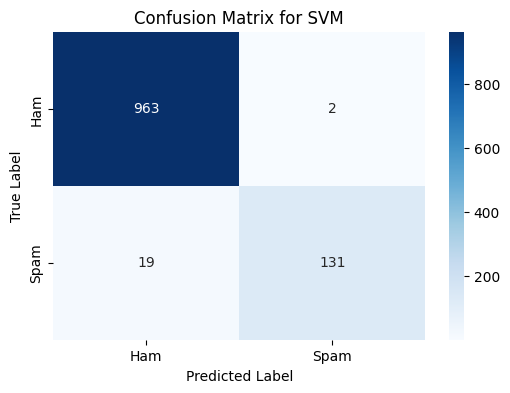


Best Logistic Regression Parameters: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.9730941704035875
Logistic Regression Precision: 0.96875
Logistic Regression Recall: 0.8266666666666667
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.97      0.83      0.89       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



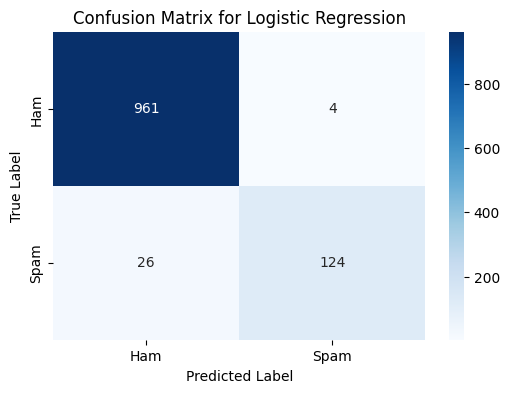

In [57]:
# Display results
print("Best SVM Parameters:", svm_grid.best_params_)
print("SVM Accuracy:", svm_best_accuracy)
print("SVM Precision:", svm_best_precision)
print("SVM Recall:", svm_best_recall)
print("SVM Classification Report:\n", svm_best_report)

# Plot confusion matrices
plot_confusion_matrix(svm_best_conf_matrix, "SVM")

print("\nBest Logistic Regression Parameters:", lr_grid.best_params_)
print("Logistic Regression Accuracy:", lr_best_accuracy)
print("Logistic Regression Precision:", lr_best_precision)
print("Logistic Regression Recall:", lr_best_recall)
print("Logistic Regression Classification Report:\n", lr_best_report)

# Plot confusion matrices
plot_confusion_matrix(lr_best_conf_matrix, "Logistic Regression")